In [3]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [21]:
# chargement et affichage des données
data = pd.read_csv('D:\Dev\Mes fichiers Python\Fichiers de données\course+-+Quiz+P4+(1).csv')
data.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,1643543,40
1,2,M,00:32:40,27,1643560,34
2,3,M,00:33:15,76,1643595,44
3,4,M,00:33:23,76,1643603,46
4,5,M,00:33:29,76,1643609,26


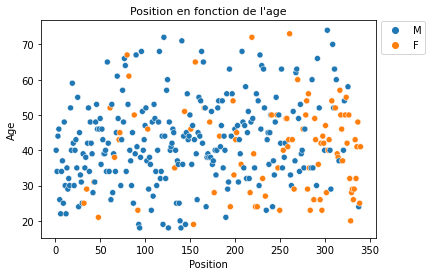

In [22]:
# nuage de point montant en fonction de solde_avt_ope
import seaborn as sns
#plt.scatter(data['solde_avt_ope'], data['montant'])
sns.scatterplot(data=data, x='Position', y='Age', hue='Sexe')
plt.title("Position en fonction de l'age", fontsize = 11)
plt.ylabel("Age")
plt.xlabel("Position")
plt.legend(bbox_to_anchor=(1, 1.02))

In [23]:
data['Age'] = (data['Age']).astype(np.float64)

In [24]:
data['Age'].dtype

dtype('float64')

In [25]:
taille_classe = 10 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(data["Age"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(data["Age"], tranches) # associe chaque solde à son numéro de classe

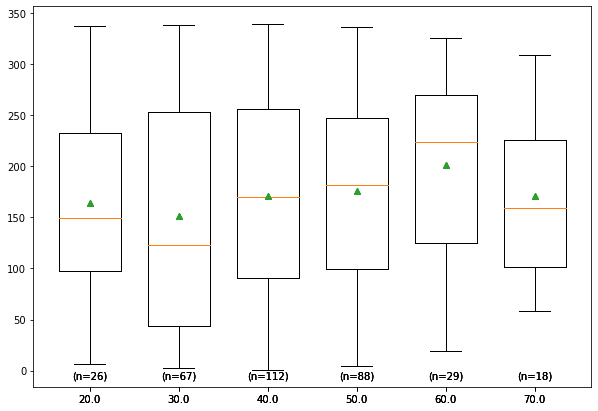

In [28]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    positions = data.loc[indices==ind,"Position"] # sélection des individus de la tranche ind
    if len(positions) > 0:
        g = {
            'valeurs': positions,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(positions),
            'quartiles': [np.percentile(positions,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7,
           showmeans=True) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

In [38]:
import scipy.stats as st
import numpy as np

r=st.pearsonr(data['Age'],data['Position'])[0]

print(st.pearsonr(data['Age'],data['Position'])[0])

0.1060649087157278


In [40]:
import statsmodels.api as sm
Y = data['Position']
X = data[['Age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Age'],result.params['intercept']

print ('a=',a)
print ('b=',b)
print ('r²=',(r*r))

a= 0.862176619462295
b= 134.33169081355678
r²= 0.01124976486087567


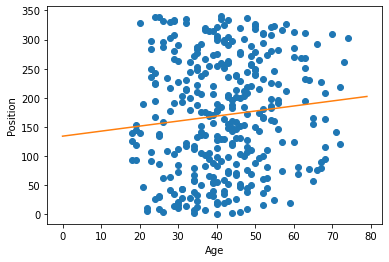

In [33]:
plt.plot(data.Age,data.Position, "o")
plt.plot(np.arange(80),[a*x+b for x in np.arange(80)])
plt.xlabel("Age")
plt.ylabel("Position")
plt.show()

In [41]:
# Analysez une variable quantitative et une qualitative par ANOVA

X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

# On ne garde que les dépenses
sous_echantillon = data

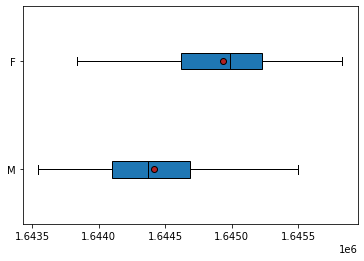

In [42]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [44]:
X = "Sexe" # qualitative
Y = "Temps_secondes" # quantitative

sous_echantillon = data # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# cette fonction calcule le rapport de corrélation entre les 2 variables 
# s'il est proche de 0, peut de corrélation, beaucoup de corrélation à priori
# η2Y/X=Vinterclasses/Vtotale
# cad rapport de corrélation = Variation interclasse / Variation totale
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.20400517398334017